# Proyek Analisis Data: Bike Sharing 
- **Nama:** Hussain Tamam Gucci Al Fauzan
- **Email:** tamam.alfauzan@gmail.com

## Menentukan Pertanyaan Bisnis

- **Apakah cuaca berpengaruh pada jumlah penyewaan sepeda?**  
- **Bagaimana distribusi penyewaan sepeda pada hari kerja dibandingkan akhir pekan, serta kelompok pengguna manakah yang sering memakainya?**  
- **Pada jam berapakah jumlah penyewaan sepeda mencapai angka tertinggi?**  

## Import Semua Packages/Library yang Digunakan

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [26]:
bike_day_df = pd.read_csv('data/day.csv')

bike_hour_df = pd.read_csv('data/hour.csv')

In [27]:
bike_day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
bike_hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada dataset terdapat 2 file, yakni day.csv dan hour.csv
- Dataset berisi informasi penyewaan sepeda berdasarkan hari dan jam, yang meliputi fitur cuaca, musim, hari libur dan kondisi bekerja.
- Kedua file ini memiliki struktur yang sama, perbedaanya hanya pada day.csv yang tidak memiliki kolom hr
- Beberapa fitur penting yang ada pada dataset ini antara lain:
   + instant: index data
   + season: Musim saat penyewaan (1 = semi, 2 = panas, 3 = gugur, 4 = dingin).
   + holiday: Apakah hari tersebut adalah hari libur (0 = tidak, 1 = ya).
   + workingday: Apakah hari tersebut merupakan hari kerja (0 = tidak, 1 = ya).
   + weathersit: Kondisi cuaca (1 = cerah, 2 = mendung, 3 = hujan ringan, 4 = hujan lebat).
   + temp: Suhu dalam skala Celscius yang telah dinormalisasi.
   + atemp: Suhu yang dirasakan dalam skala Celscius yang telah dinormalisasi.
   + hum: Tingkat kelembaban yang telah dinormalisasi.
   + windspeed: Kecepatan angin yang telah dinormalisasi.
   + casual: Jumlah pengguna sepeda yang tidak terdaftar.
   + registered: Jumlah pengguna sepeda yang terdaftar.
   + cnt: Total jumlah penyewaan sepeda (casual + registered).

### Assessing Data

#### Assesing Data Harian

In [29]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [30]:
bike_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [31]:
print("Jumlah duplikasi: ", bike_day_df.duplicated().sum())

Jumlah duplikasi:  0


In [32]:
bike_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assesing Data Jam

In [33]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [34]:
bike_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [35]:
print("Jumlah duplikasi: ", bike_hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
bike_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**  
- Dataset ini terdiri dari **731 baris dan 16 kolom** pada data harian (*day.csv*) dan **17379 baris dan 17 kolom** pada data jam (*hour.csv*) yang dimana semua kolom tidak terdapat nilai yang hilang/missing values maupun duplikat.  
- Kolom `dteday` memiliki tipe data **object** yang merepresentasikan tanggal, hal ini lebih baik diganti menjadi **datetime** untuk memudahkan proses analisis.  
- Kolom `temp`, `atemp`, `hum`, dan `windspeed` memiliki tipe data **float64** yang merepresentasikan nilai yang sudah dinormalisasi.  
- Kolom `cnt` merepresentasikan total penyewaan sepeda yang berasal dari penjumlahan kolom **casual** dan **registered**.  
- Pada dataset jam, terdapat tambahan kolom `hr` yang merepresentasikan jam dalam satu hari (0–23).  


### Cleaning Data

Pada proses cleaning data dikarenakan tidak ada null, selanjutnya yakni mengubah tipe data dteday menjadi datetime


#### Cleaning Data Harian

In [37]:
bike_day_df["dteday"] = pd.to_datetime(bike_day_df["dteday"])

In [38]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [39]:
bike_hour_df["dteday"] = pd.to_datetime(bike_hour_df["dteday"])

In [40]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- seluruh tipe data date telah diubah

## Exploratory Data Analysis (EDA)

### Explore Data Harian

In [41]:
bike_day_df.describe(include="all", datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [42]:
bike_df_categorical_col = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

#Membuat dataframe untuk menampung semua kolom
bike_df_categorical = pd.concat(
    [bike_day_df[col].value_counts(normalize=True).mul(100).round(2)
     .rename('Proporsi (%)')
     .reset_index()
     .assign(Kolom=col) for col in bike_df_categorical_col], 
    ignore_index=True  
)

# Ubah nama kolom agar lebih deskriptif
bike_df_categorical = bike_df_categorical.rename(columns={'index': 'Kategori'})

# Urutkan kolom agar lebih rapi
bike_df_categorical = bike_df_categorical[['Kolom', 'Kategori', 'Proporsi (%)']]

# Tampilkan tabel
bike_df_categorical

,Kolom,Kategori,Proporsi (%)
0,season,3,25.72
1,season,2,25.17
2,season,1,24.76
3,season,4,24.35
4,yr,1,50.07
5,yr,0,49.93
6,mnth,1,8.48
7,mnth,3,8.48
8,mnth,5,8.48
9,mnth,7,8.48


###### Mencari outlier pada data numerik

In [43]:
bike_day_df_nums_col = ["temp","atemp","hum","windspeed"]

bike_day_df_nums = pd.DataFrame()

for col in bike_day_df_nums_col:
    desc = bike_day_df[col].describe()
    
    #menentukan batas IQR
    Q1 = desc.quantile(0.25)
    Q3 = desc.quantile(0.75)
    IQR = Q3 - Q1
    
    #batas outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR    
    
     # Jumlah outlier
    outliers = bike_day_df[(bike_day_df[col] < lower_bound) | (bike_day_df[col] > upper_bound)][col].count()
    
     # Menyimpan hasil ke dataframe
    bike_day_df_nums= pd.concat([bike_day_df_nums,
                                 pd.DataFrame({
                                     "Kolom": [col],
                                     "Mean": [desc["mean"]],
                                     "Median": [desc["50%"]],
                                     "Min": [desc["min"]],
                                     "Max": [desc["max"]],
                                     "IQR": [IQR],
                                     "Outlier": [outliers]
                                 })], ignore_index=True)
bike_day_df_nums.head()

,Kolom,Mean,Median,Min,Max,IQR,Outlier
0,temp,0.495385,0.498333,0.059130,0.861667,0.408404,0
1,atemp,0.474354,0.486733,0.079070,0.840896,0.372553,0
2,hum,0.627894,0.626667,0.000000,0.972500,0.365174,0
3,windspeed,0.190486,0.180975,0.022392,0.507463,0.181190,0


terlihat bahwa tidak ada outlier pada data, yang berarti seluruh data sudah ternomalisasi dan tidak ada anomali

In [44]:
#Pengelompokan Penyewaan berdasarkan musim dan suhu
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
bike_day_df["season_name"] = bike_day_df["season"].map(season_mapping)

bike_day_df.groupby(by="season_name").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"]
}).reset_index().sort_values(by=("cnt", "sum"), ascending=False)

season_name      cnt      temp                              
                   sum       max       min      mean       std
0        Fall  1061129  0.861667  0.469167  0.706309  0.070848
2      Summer   918589  0.808333  0.253043  0.544405  0.122650
3      Winter   841613  0.657500  0.220833  0.422906  0.107834
1      Spring   471348  0.572500  0.059130  0.297748  0.102735

In [45]:
#Pengelompokan Tipe pengguna setiap musimnya
bike_day_df["season_name"] = bike_day_df["season"].map(season_mapping)
print("\nTotal Penyewaan Berdasarkan Tipe Pengguna di Setiap Musim:")
bike_day_df.groupby(["season_name"]).agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()


Total Penyewaan Berdasarkan Tipe Pengguna di Setiap Musim:


,season_name,casual,registered
0,Fall,226091,835038
1,Spring,60622,410726
2,Summer,203522,715067
3,Winter,129782,711831


In [46]:
## Distribusi jumlah pengguna berdasarkan tahun
bike_day_df.groupby(by="yr").cnt.sum().reset_index().sort_values(by="cnt", ascending=False).replace({0: "2011", 1: "2012"}).head()

,yr,cnt
1,2012,2049576
0,2011,1243103


In [47]:
#Mengelompokan jenis pengguna berdasarkan kondisi cuaca
weather_mapping = {1: "Cerah", 2: "Berkabut", 3: "Hujan Ringan", 4: "Cuaca Buruk"}
bike_day_df["weather_name"] = bike_day_df["weathersit"].map(weather_mapping)

print("Total Penyewaan dan Statistik Cuaca:")
bike_day_df.groupby(by="weather_name").agg({
    "cnt": "sum",
    "temp": ["mean"],
    "hum": ["mean"],
    "windspeed": ["mean"]
}).reset_index()

Total Penyewaan dan Statistik Cuaca:


,weather_name,cnt,temp,hum,windspeed
,,sum,mean,mean,mean
0,Berkabut,996858,0.470366,0.725887,0.186431
1,Cerah,2257952,0.511541,0.565594,0.190253
2,Hujan Ringan,37869,0.433440,0.848872,0.243336


In [48]:
print("\nTotal Penyewaan Berdasarkan Hari Kerja dan Akhir Pekan:")
bike_day_df.groupby(by="workingday").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}).reset_index().replace({0: "Weekend", 1: "Working Day"})



Total Penyewaan Berdasarkan Hari Kerja dan Akhir Pekan:


,workingday,cnt,casual,registered
0,Weekend,1000269,316732,683537
1,Working Day,2292410,303285,1989125


In [49]:
bike_day_df["mnth_name"] = bike_day_df["mnth"].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})
month_group = bike_day_df.groupby(by="mnth_name").cnt.sum().reset_index()
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_group["mnth_name"] = pd.Categorical(month_group["mnth_name"], categories=month_order, ordered=True)
month_group = month_group.sort_values(by="cnt", ascending=False).reset_index(drop=True)

print("\nTotal Penyewaan Berdasarkan Bulan:")
month_group


Total Penyewaan Berdasarkan Bulan:


,mnth_name,cnt
0,Aug,351194
1,Jun,346342
2,Sep,345991
3,Jul,344948
4,May,331686
5,Oct,322352
6,Apr,269094
7,Nov,254831
8,Mar,228920
9,Dec,211036


### Explore Data Jam

In [50]:
print("Jam dengan Penyewaan Tertinggi:")
# Menghitung jumlah penyewaan berdasarkan jam
bike_hour_df.groupby(by="hr").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}).reset_index().sort_values(by="cnt", ascending=False).head()

Jam dengan Penyewaan Tertinggi:


,hr,cnt,casual,registered
17,17,336860,54220,282640
18,18,309772,44496,265276
8,8,261001,15761,245240
16,16,227748,53834,173914
19,19,226789,35505,191284


In [51]:
print("\nTotal Penyewaan Berdasarkan Jam dan Jenis Pengguna:")
# Grouping per jenis penyewa (casual dan registered)
bike_hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index().sort_values(by="registered", ascending=False)


Total Penyewaan Berdasarkan Jam dan Jenis Pengguna:


,hr,casual,registered
17,17,54220,282640
18,18,44496,265276
8,8,15761,245240
19,19,35505,191284
16,16,53834,173914
7,7,8037,146134
20,20,26378,138172
9,9,22458,136980
12,12,49718,134696
13,13,52713,132206


In [52]:
print("\nDistribusi Penyewaan per Jam di Hari Kerja vs. Akhir Pekan:")
bike_hour_df.groupby(by=["hr", "workingday"]).agg({
    "cnt": "sum"
}).reset_index().replace({"workingday": {1: "Weekday", 0: "Weekend"}}).pivot(index="hr", columns="workingday", values="cnt").fillna(0)



Distribusi Penyewaan per Jam di Hari Kerja vs. Akhir Pekan:


workingday,Weekday,Weekend
hr,,
0,18246,20884
1,8177,15987
2,4229,12123
3,2323,5851
4,2552,1876
5,12332,1929
6,50840,4292
7,144144,10027
8,236595,24406


In [53]:
#Mengelompokan jenis pengguna berdasarkan kondisi cuaca (data jam)

bike_hour_df["weather_name"] = bike_hour_df["weathersit"].map(weather_mapping)

print("Total Penyewaan dan Statistik Cuaca (Data Per-jam: ")
bike_hour_df.groupby(by="weather_name").agg({
    "cnt": "sum",
    "temp": ["mean"],
    "hum": ["mean"],
    "windspeed": ["mean"]
}).reset_index().sort_values(by=("cnt","sum"), ascending=False)

Total Penyewaan dan Statistik Cuaca (Data Per-jam: 


,weather_name,cnt,temp,hum,windspeed
,,sum,mean,mean,mean
1,Cerah,2338173,0.511054,0.573747,0.190553
0,Berkabut,795952,0.474445,0.698807,0.179973
3,Hujan Ringan,158331,0.456688,0.827632,0.218825
2,Cuaca Buruk,223,0.186667,0.883333,0.204000


In [54]:
bike_hour_df["weathersit"].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

**Insight:**
### Penyewaan Berdasarkan Musim
Penyewaan sepeda berdasarkan musim menunjukkan bahwa:
- **Fall** memiliki jumlah penyewaan tertinggi, diikuti oleh **Summer**, **Winter**, dan terakhir **Spring**.
- Pengguna **casual** cenderung meningkat pada **musim panas (Summer)** dibandingkan dengan **musim dingin (Winter)**.
- Pengguna **registered** hanya memiliki sedikit perbedaan jumlah penyewaan antara kedua musim tersebut.

### Penyewaan Berdasarkan Tahun
- Terdapat peningkatan jumlah penyewaan dari tahun **2011** ke **2012** sebanyak **8000 penyewaan**.

### Penyewaan Berdasarkan Cuaca
- Penyewaan tertinggi terjadi pada cuaca **cerah**.
- Cuaca **hujan ringan** menempati urutan kedua.
- Cuaca **berkabut** berada di urutan ketiga.
- Tidak ada penyewaan yang tercatat pada **cuaca buruk** pada data harian.
- Namun pada data per jam **ada sedikit penyewaan** pada saat hujan lebat

### Penyewaan Berdasarkan Hari Kerja dan Akhir Pekan
- Pengguna **casual** lebih banyak menyewa pada saat **akhir pekan (Weekend)**.
- Pengguna **registered** lebih banyak menyewa pada **hari kerja (Weekday)**.

### Penyewaan Berdasarkan Bulan
- **Agustus** menjadi bulan dengan jumlah penyewaan tertinggi.
- **Desember** menjadi bulan dengan jumlah penyewaan terendah.

### Penyewaan Berdasarkan Jam
- Jam penyewaan tertinggi didominasi oleh jam **5 sore** dan **6 sore**.
- Posisi ketiga diisi oleh jam **8 pagi**.

### Penyewaan Berdasarkan Jam pada Hari Kerja vs. Akhir Pekan
- Pada **hari kerja**, jam penyewaan terbanyak adalah jam **5 sore**, **6 sore**, dan **8 pagi**.
- Pada **akhir pekan**, jam penyewaan terbanyak adalah jam **1 siang**, **12 siang**, dan **2 sore**.


## Visualization & Explanatory Analysis

### Pertanyaan 1: **Apakah cuaca berpengaruh pada jumlah penyewaan sepeda?**  

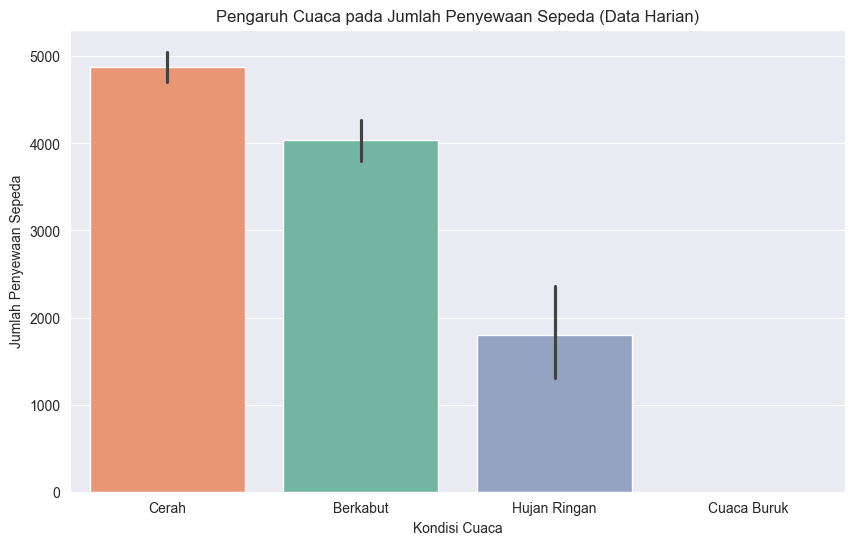

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x="weather_name", y="cnt", hue="weather_name", data=bike_day_df, order=["Cerah", "Berkabut", "Hujan Ringan", "Cuaca Buruk"], palette="Set2", legend=False)
plt.title("Pengaruh Cuaca pada Jumlah Penyewaan Sepeda (Data Harian)")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

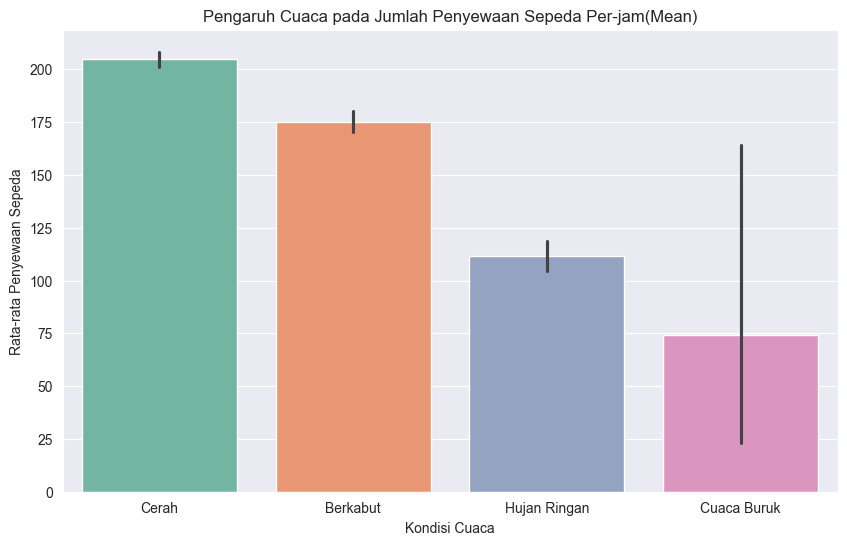

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x="weather_name", y="cnt", hue="weather_name", data=bike_hour_df, order=["Cerah", "Berkabut", "Hujan Ringan", "Cuaca Buruk"], palette="Set2", legend=False)
plt.title("Pengaruh Cuaca pada Jumlah Penyewaan Sepeda Per-jam(Mean)")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()

#### Clustering Penyewaan Sepeda

In [57]:
# Membuat Kategori Penyewaan Sepeda
q1 = bike_day_df["cnt"].quantile(0.25)
q3 = bike_day_df["cnt"].quantile(0.75)

In [58]:
def categorize_demand(cnt):
    if cnt > q3:
        return "High Demand"
    elif cnt > q1:
        return "Medium Demand"
    else:
        return "Low Demand"

In [59]:
bike_day_df["demand_category"] = bike_day_df["cnt"].apply(categorize_demand)

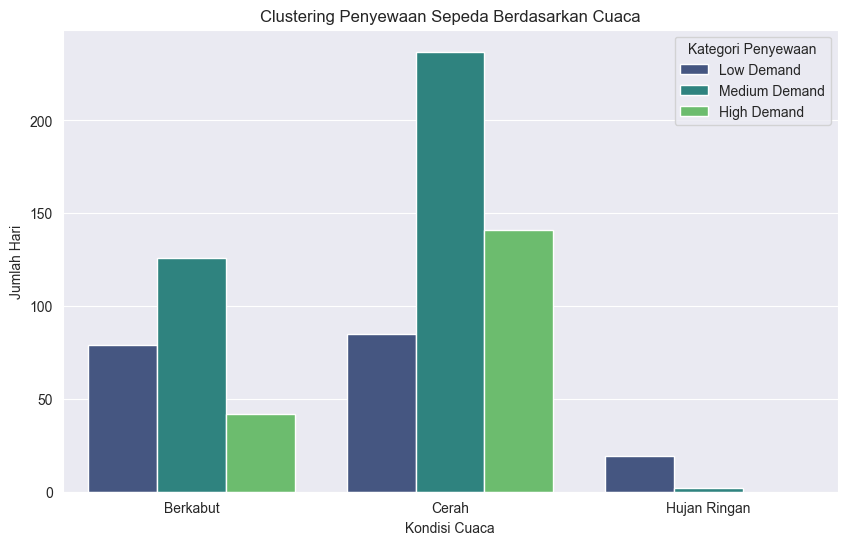

In [60]:
# Visualisasi Clustering Penyewaan Sepeda
plt.figure(figsize=(10, 6))
sns.countplot(x="weather_name", hue="demand_category", data=bike_day_df, palette="viridis")
plt.title("Clustering Penyewaan Sepeda Berdasarkan Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Hari")
plt.legend(title="Kategori Penyewaan")
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa jumlah penyewaan sepeda tertinggi terjadi pada kondisi cuaca **cerah**, diikuti oleh **berkabut** dan **hujan ringan**. Tidak terdapat penyewaan sepeda pada kondisi **cuaca buruk** pada data harian, yang menunjukkan bahwa cuaca sangat berpengaruh pada minat penyewa dalam menggunakan sepeda.

Cuaca cerah memberikan kenyamanan dan keamanan lebih bagi penyewa, sehingga menarik lebih banyak pengguna. Sementara itu, pada cuaca berkabut dan hujan ringan, jumlah penyewaan cenderung menurun karena faktor kenyamanan dan keamanan yang berkurang. **Namun, perlu diperhatikan bahwa jumlah jam pengamatan pada kondisi cuaca buruk sangat sedikit dibandingkan kondisi lainnya, sehingga dapat memengaruhi rendahnya jumlah penyewaan pada kondisi tersebut.**

Berdasarkan rata-rata penyewaan per jam, jumlah penyewaan sepeda pada **cuaca cerah** lebih tinggi dibandingkan kondisi cuaca lainnya, yang menegaskan bahwa **kondisi cuaca memiliki pengaruh signifikan** terhadap aktivitas penyewaan.

### Pertanyaan 2: **Bagaimana distribusi penyewaan sepeda pada hari kerja dibandingkan akhir pekan, serta kelompok pengguna manakah yang sering memakainya?**  

In [61]:
# Mapping Hari Kerja dan Akhir Pekan
weekday_mapping = {0: "Akhir Pekan", 1: "Hari Kerja"}
bike_day_df["weekday_name"] = bike_day_df["workingday"].map(weekday_mapping)

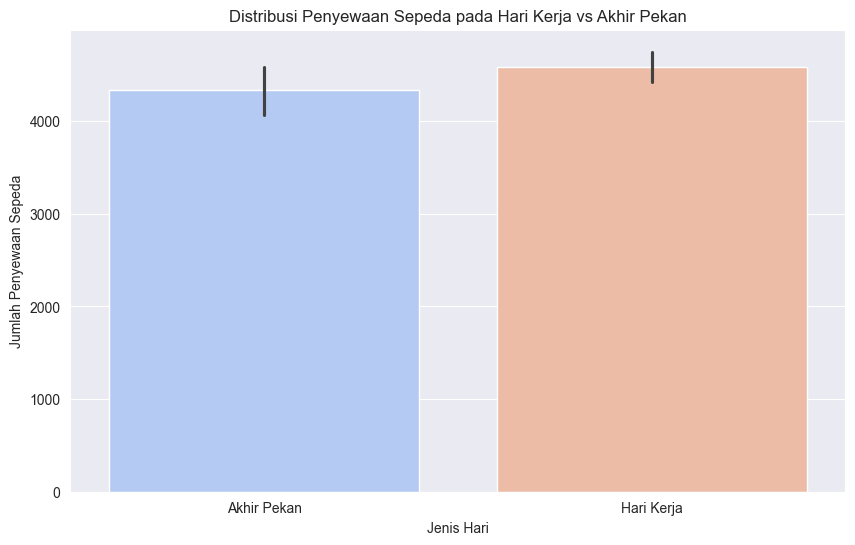

In [62]:
# Visualisasi Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan
plt.figure(figsize=(10, 6))
sns.barplot(x="weekday_name", y="cnt", hue="weekday_name", data=bike_day_df, palette="coolwarm", legend=False)
plt.title("Distribusi Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Jenis Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13940\333119927.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  bike_day_melted = bike_day_df.melt(id_vars=["weekday_name"], value_vars=["casual", "registered"], var_name="user_type", value_name="cnt")


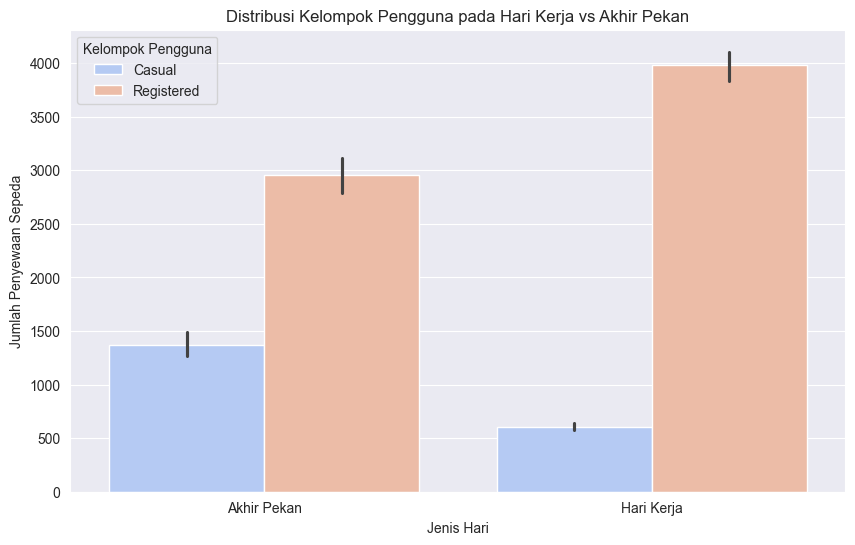

In [63]:
# Membuat DataFrame Melt untuk Pengguna Casual dan Registered
bike_day_melted = bike_day_df.melt(id_vars=["weekday_name"], value_vars=["casual", "registered"], var_name="user_type", value_name="cnt")
bike_day_melted["user_type"] = bike_day_melted["user_type"].map({"casual": "Casual", "registered": "Registered"})

# Visualisasi Kelompok Pengguna
plt.figure(figsize=(10, 6))
sns.barplot(x="weekday_name", y="cnt", hue="user_type", data=bike_day_melted, palette="coolwarm")
plt.title("Distribusi Kelompok Pengguna pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Jenis Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.legend(title="Kelompok Pengguna")
plt.show()

Dari visualisasi yang dilakukan, dapat dilihat bahwa jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai alat transportasi sehari-hari oleh pengguna terdaftar (registered) daripada pengguna biasa (casual). Sebaliknya, pengguna casual cenderung lebih banyak menyewa sepeda pada akhir pekan, yang kemungkinan besar digunakan untuk keperluan rekreasi.


### Pertanyaan 3: **Pada jam berapakah jumlah penyewaan sepeda mencapai angka tertinggi?**  


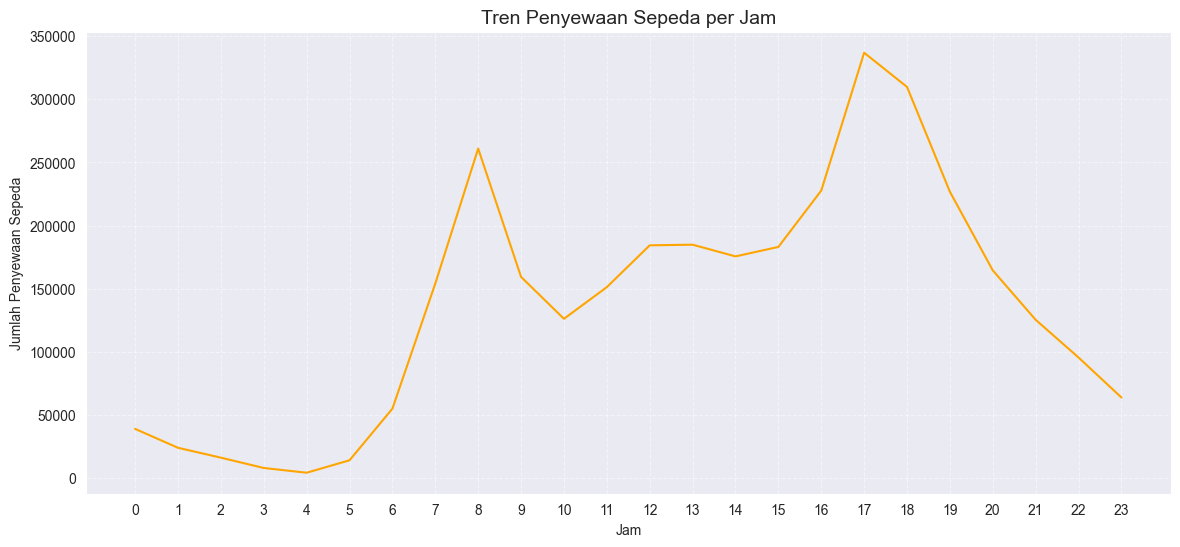

In [64]:
plt.figure(figsize=(14, 6))
sns.lineplot(x="hr", y="cnt", data=bike_hour_df, estimator="sum", errorbar=None, color="orange")
plt.title("Tren Penyewaan Sepeda per Jam", fontsize=14)
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

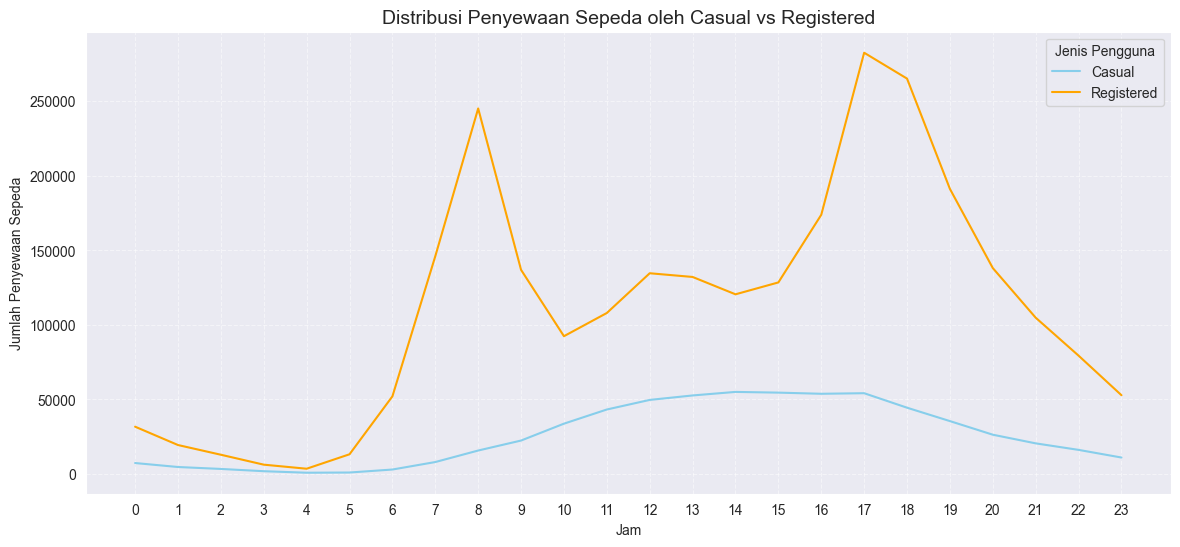

In [65]:
# Visualisasi Penyewaan Sepeda oleh Casual vs Registered
plt.figure(figsize=(14, 6))
sns.lineplot(x="hr", y="casual", data=bike_hour_df, estimator="sum", errorbar=None, label="Casual", color="skyblue")
sns.lineplot(x="hr", y="registered", data=bike_hour_df, estimator="sum", errorbar=None, label="Registered", color="orange")

plt.title("Distribusi Penyewaan Sepeda oleh Casual vs Registered", fontsize=14)
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.legend(title="Jenis Pengguna")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

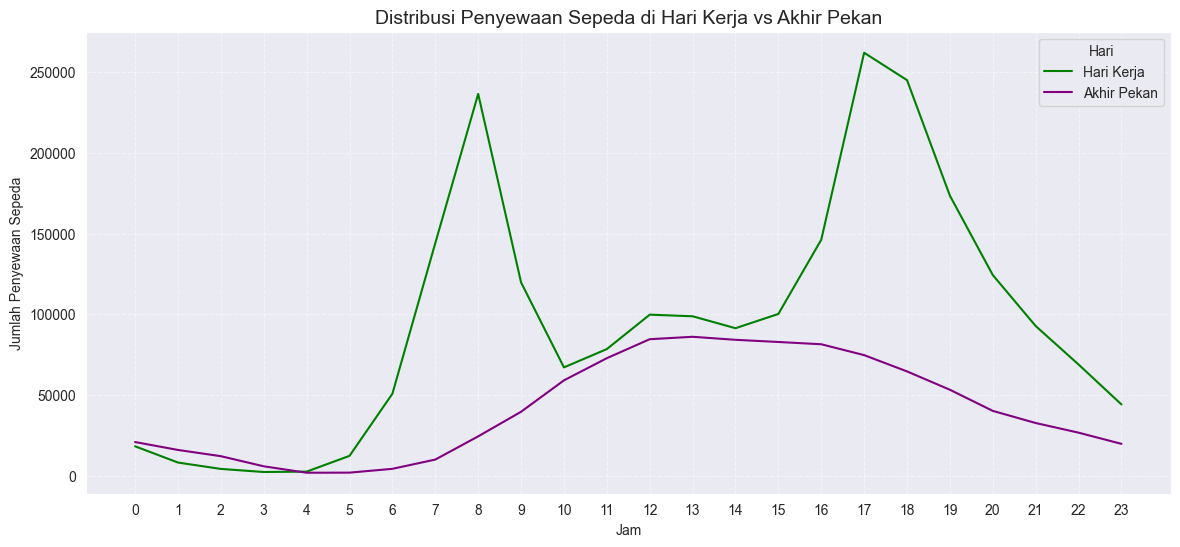

In [66]:
# Visualisasi Distribusi Penyewaan di Hari Kerja vs Akhir Pekan
plt.figure(figsize=(14, 6))
sns.lineplot(
    x="hr", y="cnt", hue="workingday", data=bike_hour_df, estimator="sum", errorbar=None,
    palette=["green", "purple"], hue_order=[1, 0]
)

plt.title("Distribusi Penyewaan Sepeda di Hari Kerja vs Akhir Pekan", fontsize=14)
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.legend(title="Hari", labels=["Hari Kerja", "Akhir Pekan"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

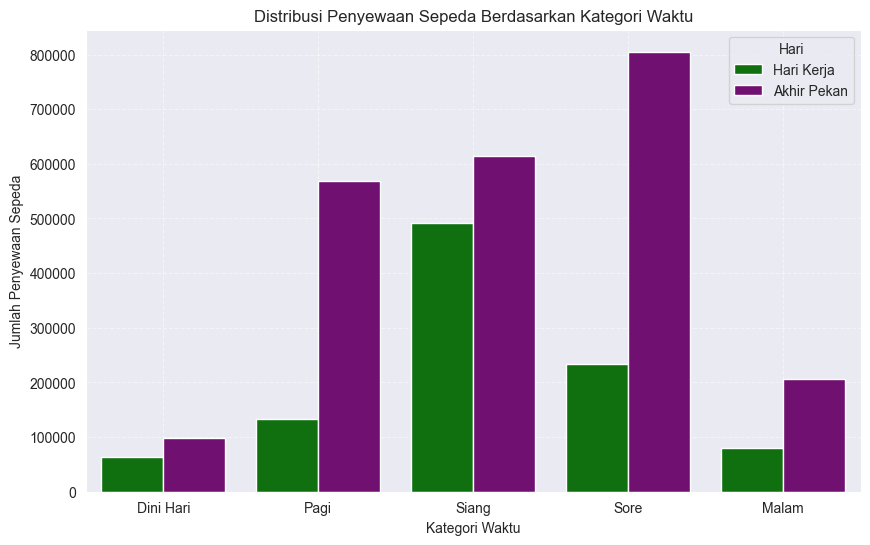

In [67]:
# Binning Jam ke dalam Kategori Waktu
def categorize_hour(hour):
    if 0 <= hour <= 6:
        return "Dini Hari"
    elif 6 < hour <= 10:
        return "Pagi"
    elif 10 < hour <= 16:
        return "Siang"
    elif 16 < hour <= 20:
        return "Sore"
    else:
        return "Malam"

bike_hour_df["time_category"] = bike_hour_df["hr"].apply(categorize_hour)

# Visualisasi Clustering
plt.figure(figsize=(10, 6))
sns.barplot(
    x="time_category", y="cnt", hue="workingday", data=bike_hour_df, estimator="sum", errorbar=None,
    palette=["green", "purple"]
)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kategori Waktu")
plt.xlabel("Kategori Waktu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.legend(title="Hari", labels=["Hari Kerja", "Akhir Pekan"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Dalam visualisasi ini terlihat bahwa puncak peminjaman terjadi pada pagi dan sore hari yang menandakan sepeda lebih sering digunakan untuk kebutuhan commuter hal ini didukung dengan jam penyewaan tertinggi pada jam 17:00-18:00 di hari kerja dibandingkan dengan penyewaan akhir pekan sekitar  siang hari.

## Conclusion

- Conclution pertanyaan 1
**Pertanyaan 1: Apakah cuaca berpengaruh pada jumlah penyewaan sepeda?**
Berdasarkan analisis, **kondisi cuaca memiliki pengaruh signifikan** terhadap jumlah penyewaan sepeda.
+ Cuaca **cerah atau berawan ringan** cenderung meningkatkan jumlah penyewaan dibandingkan dengan cuaca buruk
+ Penurunan jumlah penyewaan saat kondisi cuaca ekstrim, menandakan bahwa pengguna lebih memilih moda transportasi lain saat cuacca tidak mendukung.
+ Rendahnya jumlah penyewaan pada kondisi cuaca buruk tidak hanya menunjukkan pengaruh cuaca, tetapi juga dipengaruhi oleh frekuensi cuaca buruk yang jarang terjadi dalam data per jam.  
- Conclution pertanyaan 2
**Pertanyaan 2: Bagaimana distribusi penyewaan sepeda pada hari kerja dibandingkan akhir pekan, serta kelompok pengguna manakah yang sering memakainya?**
Distribusi penyewaan sepeda menunjukkan pola yang berbeda antara **hari kerja** dan **akhir pekan**
+ Pada **hari kerja**, puncak peminjaman terjadi pada jam sibuk (pagi dan sore hari) yang didominasi oleh **pengguna registered (terdaftar)**, menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas **komuter**.
+ Sementara pada **akhir pekan**, penyewaan lebih banyak dilakukan oleh **pengguna casual (tidak terdaftar)** di siang hingga sore hari, yang memperlihatkan penggunaan sepeda untuk rekreasi.
- Conclution pertanyaan 3
**Pertanyaan 3: Pada jam berapakah jumlah penyewaan sepeda mencapai angka tertinggi?**
Jumlah penyewaan sepeda mencapai angka tertinggi pada:
+ Hari kerja: Pukul **17.00–18.00**, kemungkinan besar berhubungan dengan aktivitas pulang kerja.
+ Akhir pekan: Pukul **14.00–15.00*, yang menunjukkan waktu terbaik untuk aktivitas rekreasi.
Jam-jam ini dapat menjadi dasar untuk menyediakan stok sepeda tambahan atau memberikan diskon khusus pada jam sepi untuk meningkatkan penyewaan.


In [68]:
day_cols = ["dteday", "season", "weathersit", "temp", "hum", "windspeed", "cnt", "casual", "registered", "workingday"]
hour_cols = ["dteday", "hr", "season", "weathersit", "temp", "hum", "windspeed", "cnt", "casual", "registered", "workingday"]
combined_df = pd.merge(bike_hour_df, bike_day_df, on=["dteday", "season", "weathersit", "temp", "hum", "windspeed", "workingday", "cnt", "casual", "registered"], how="outer")

combined_df.to_csv("dashboard/main_data.csv",index=True)